# Sobre a base de dados
- Essa é uma base de dados com transações realizadas com o cartão de crédito.
- Essa base tem como retorno transações consideradas fraudulentas ou não. Por isso, iremos desenvolver um modelo de ML para que possa detectar um transação do tipo fraudulenta
- Base desse tipo pode ser encontrada no seguinte link:
https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
- Lembrando que a base utilizada **NÃO** é a do link acima

### Dicionário
- V1 - V12 -> São as Features transformadas através do PCA (Análise de Componentes Principais)
- target:
        - 1 - Fraude; 
        - 0 - Não Fraude

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
dados = pd.read_csv('classificacao_Q1.csv')

In [3]:
dados.head()

,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,target
0,-1.79796,-1.75901,-2.14257,-0.01878,-0.58601,-3.08224,-1.71369,1.41805,2.29783,1.11745,-3.43483,1.94926,0
1,-2.78612,-1.60622,-4.05247,3.33814,1.44255,-3.95343,-3.32328,0.71019,2.31973,0.57596,-4.22278,0.51171,0
2,-1.31957,2.61125,-0.99663,0.34752,0.85253,4.22652,0.84765,0.88530,-1.01460,1.03488,-0.84593,2.64307,1
3,-3.26219,-2.11510,0.68081,-0.49290,-2.45122,-2.37668,-0.00338,3.95559,1.42793,1.68710,-1.35533,2.82004,0
4,5.26181,1.85527,-2.29242,-0.86763,0.11625,-2.17675,-1.72692,-2.34726,1.98107,-4.58177,-2.26649,-3.33875,1


In [4]:
dados.shape

(1800, 13)

In [5]:
#dados nulos
print(dados.isna().sum())

v_1       0
v_2       0
v_3       0
v_4       0
v_5       0
v_6       0
v_7       0
v_8       0
v_9       0
v_10      0
v_11      0
v_12      0
target    0
dtype: int64


In [6]:
#Entender a feature 'target' para sabermos a quantidade de transações fraudulentas
n_transacoes = dados.target.count()

print('Número de transações: {}'.format(n_transacoes))




Número de transações: 1800


In [7]:
n_fraudes = dados.target.sum()
fraudes_porc = n_fraudes / n_transacoes

print('Número de fraudes: {}. Percentual com fraude: {:.2%}'.format(n_fraudes, fraudes_porc))

Número de fraudes: 991. Percentual com fraude: 55.06%


In [8]:
sem_fraude = n_transacoes - n_fraudes
sem_fraude_perc = sem_fraude / n_transacoes

print('Número de transações sem fraudes {}. Percentual sem fraude: {:.2%}'.format(sem_fraude, sem_fraude_perc))

Número de transações sem fraudes 809. Percentual sem fraude: 44.94%


### Modelo: árvore de decisão
- temos os dados rotulados
- vamos utilizar o modelo de classificação DecisionTreeClassifier
- vamos modificar alguns hiperparâmetros:
    - max_depth: utilizado para definir a profundidade da árvore
    - criterion: medir a qualidade de uma divisão da árvore
    - min_samples_leaf: número mínimo de amostras necessárias para estar em um nó folha
- para avaliar o melhor modelo vamos utilizar as seguintes métricas:
    - acurácia
    - precisão
    - recall
    - curva ROC
 
### Curva ROC
Avalia o desempenho do modelo a partir da relação entre a taxa de verdadeiros positivos (sensibilidade) e a taxa de falsos positivos (especificidade) para diferentes limites.

In [9]:
#separação dos modelos de treino e teste. Com 30% de teste
from sklearn.model_selection import train_test_split
X = dados.drop(columns = 'target')
y = dados.target
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=10)

In [10]:
#Importando as métricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

A acurácia foi do modelo foi de: 90.19%
A precisão foi do modelo foi de: 90.23%
O recall foi do modelo foi de: 92.33%


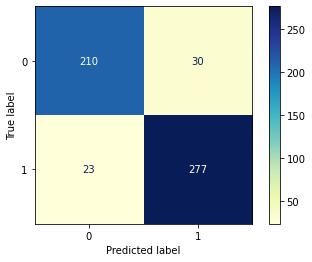

----------------------------------------------------------------------------------------------------
roc_auc 0.9


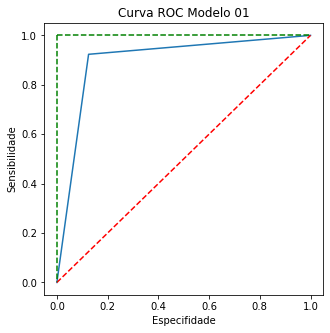

In [11]:
# Modelo 1: decision tree classifier sem modificar os hiperparâmetros
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

modelo_1 = DecisionTreeClassifier(random_state=10)
modelo_1.fit(X_train, y_train)
y_pred = modelo_1.predict(X_test)

print('A acurácia foi do modelo foi de: {:.2%}'.format(accuracy_score(y_test, y_pred)))
print('A precisão foi do modelo foi de: {:.2%}'.format(precision_score(y_test, y_pred)))
print('O recall foi do modelo foi de: {:.2%}'.format(recall_score(y_test, y_pred)))
confusion_matrix = plot_confusion_matrix(modelo_1, X_test, y_test, cmap='YlGnBu', values_format ='.3g')
plt.show()

print('-'*100)

#tfp = taxa falsos positivos (sensibilidade)
#tvp = taxa verdadeiros positivos (especificidade)

tfp, tvp, limite = roc_curve(y_test, y_pred)
print('roc_auc', roc_auc_score(y_test, y_pred).round(2))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC Modelo 01')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

A acurácia foi do modelo 2 foi de: 89.44%
A precisão foi do modelo 2 foi de: 89.58%
O recall foi do modelo 2 foi de: 91.67%


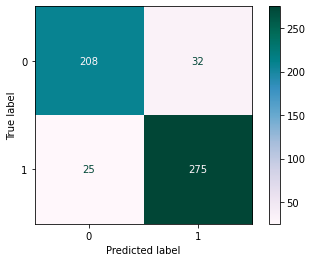

----------------------------------------------------------------------------------------------------
roc_auc 0.89


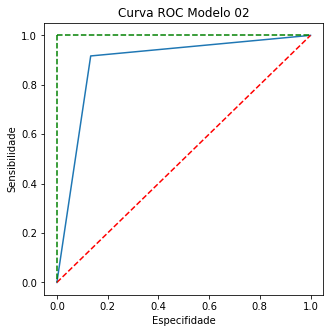

In [12]:
# Modelo 2: decision tree classifier com max_depth = 5

modelo_2 = DecisionTreeClassifier(max_depth = 5, random_state=10)
modelo_2.fit(X_train, y_train)
y_pred = modelo_2.predict(X_test)

print('A acurácia foi do modelo 2 foi de: {:.2%}'.format(accuracy_score(y_test, y_pred)))
print('A precisão foi do modelo 2 foi de: {:.2%}'.format(precision_score(y_test, y_pred)))
print('O recall foi do modelo 2 foi de: {:.2%}'.format(recall_score(y_test, y_pred)))
confusion_matrix = plot_confusion_matrix(modelo_2, X_test, y_test, cmap='PuBuGn', values_format ='.3g')
plt.show()

print('-'*100)

tfp, tvp, limite = roc_curve(y_test, y_pred)
print('roc_auc', roc_auc_score(y_test, y_pred).round(2))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC Modelo 02')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

A acurácia foi do modelo 3 foi de: 91.11%
A precisão foi do modelo 3 foi de: 92.86%
O recall foi do modelo 3 foi de: 91.00%


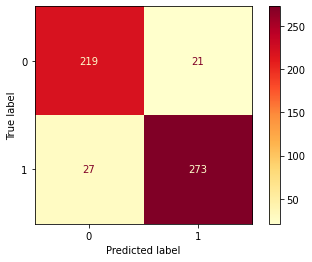

----------------------------------------------------------------------------------------------------
roc_auc 0.91


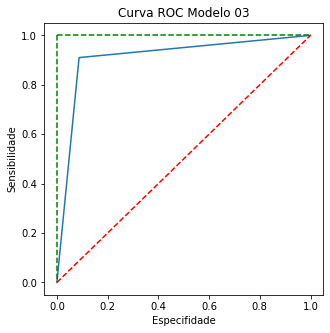

In [13]:
# Modelo 3: decision tree classifier com criterion='entropy' 

modelo_3 = DecisionTreeClassifier(criterion='entropy', max_depth = 10, random_state=10)
modelo_3.fit(X_train, y_train)
y_pred = modelo_3.predict(X_test)

print('A acurácia foi do modelo 3 foi de: {:.2%}'.format(accuracy_score(y_test, y_pred)))
print('A precisão foi do modelo 3 foi de: {:.2%}'.format(precision_score(y_test, y_pred)))
print('O recall foi do modelo 3 foi de: {:.2%}'.format(recall_score(y_test, y_pred)))
confusion_matrix = plot_confusion_matrix(modelo_3, X_test, y_test, cmap='YlOrRd', values_format ='.3g')
plt.show()

print('-'*100)

tfp, tvp, limite = roc_curve(y_test, y_pred)
print('roc_auc', roc_auc_score(y_test, y_pred).round(2))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC Modelo 03')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

A acurácia foi do modelo 4 foi de: 90.93%
A precisão foi do modelo 4 foi de: 93.13%
O recall foi do modelo 4 foi de: 90.33%


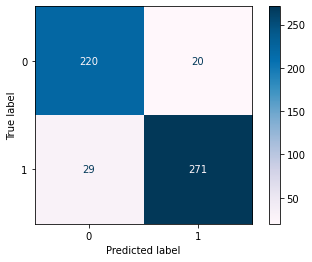

----------------------------------------------------------------------------------------------------
roc_auc 0.91


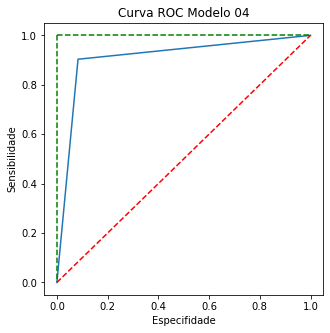

In [14]:
# Modelo 4: decision tree classifier com criterion='entropy' e min_samples_leaf= 3

modelo_4 = DecisionTreeClassifier(criterion='entropy', max_depth = 10, min_samples_leaf=3, random_state=10)
modelo_4.fit(X_train, y_train)
y_pred = modelo_4.predict(X_test)

print('A acurácia foi do modelo 4 foi de: {:.2%}'.format(accuracy_score(y_test, y_pred)))
print('A precisão foi do modelo 4 foi de: {:.2%}'.format(precision_score(y_test, y_pred)))
print('O recall foi do modelo 4 foi de: {:.2%}'.format(recall_score(y_test, y_pred)))
confusion_matrix = plot_confusion_matrix(modelo_4, X_test, y_test, cmap='PuBu', values_format ='.3g')
plt.show()

print('-'*100)

tfp, tvp, limite = roc_curve(y_test, y_pred)
print('roc_auc', roc_auc_score(y_test, y_pred).round(2))

plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC Modelo 04')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

### Observação

Não iremos alterar muito os hiperparâmetros por dois motivos:
 - para que não haja overfit
 - para o notebook não ficar muito pesado

# Conclusão:
 Dentro do nosso modelo, de detecção de fraude em transação de cartão de crédito, o melhor modelo para os nossos dados foi:
   - Modelo 3: decision tree classifier com criterion='entropy' 
   - Que apresentou os seguintes resultados:
        - A acurácia de: 91.11%
        - A precisão de: 92.86%
        - O recall de: 91.00%
        - Em relação a Curva ROC, temos uma discriminação excepcional, já que nossa área tem um valor de 0,91
